<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Employee_Attrition_prediction/blob/main/Employee_Attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict attrition of employees.**

# Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [54]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/VaishnaviKrishnamoorthy/Employee_Attrition_prediction/main/HR%20Employee%20Attrition.csv')

In [56]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [57]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 1470 rows and 35 columns


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# **Data Cleaning**

# **Target column**

In [60]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
target_count = df['Attrition'].value_counts()
print('Class No:', target_count[0])
print('Class yes:', target_count[1])

Class No: 1233
Class yes: 237


Class 0: 1233
Class 1: 237
Proportion of class 0 is  83.88 %
Proportion of class 1 is  16.12 %


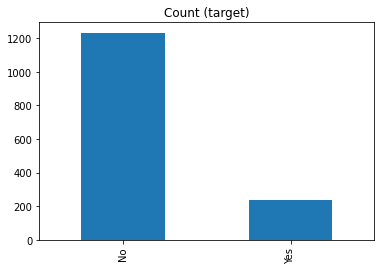

In [62]:
target_count = df ['Attrition'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

# **This is a Imbalanced dataset. where 83 percent of data belongs to one class. so we need to balance this. if we does not do that oru Machine Learning Model became biased.**

# Checking duplicates in the data

In [63]:
df.duplicated().sum()
# here we does not have any dulicate value.

0

# Checking Missing values in the data

In [64]:
df.isnull().sum()
# here we does not have any missing value.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA for numeric column

In [65]:
numeric_columns = [column for column in df.columns if df[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


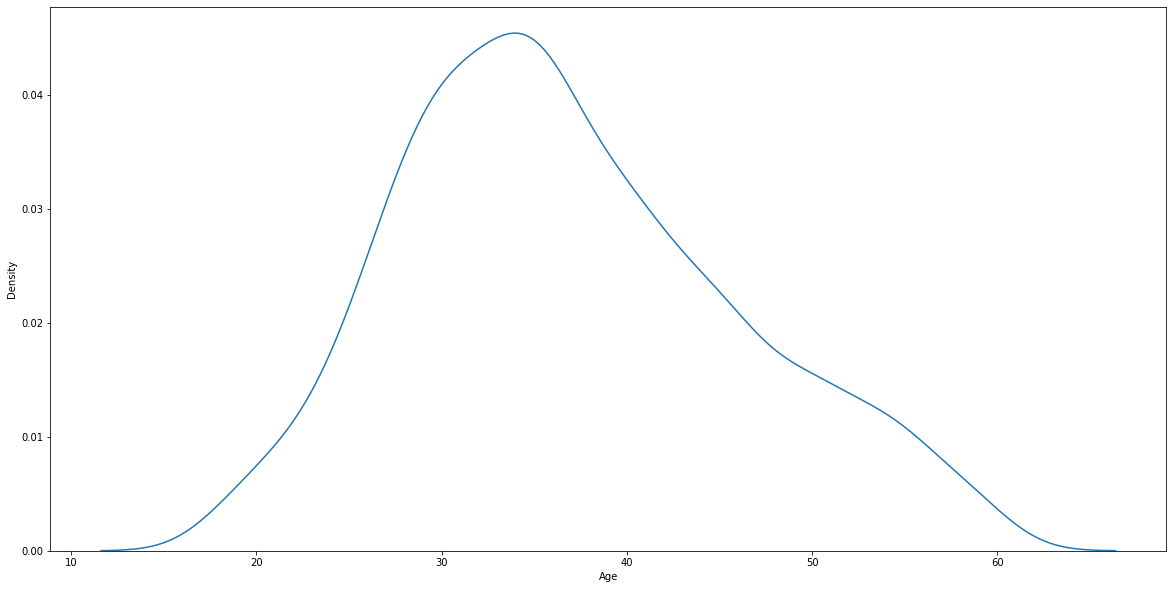

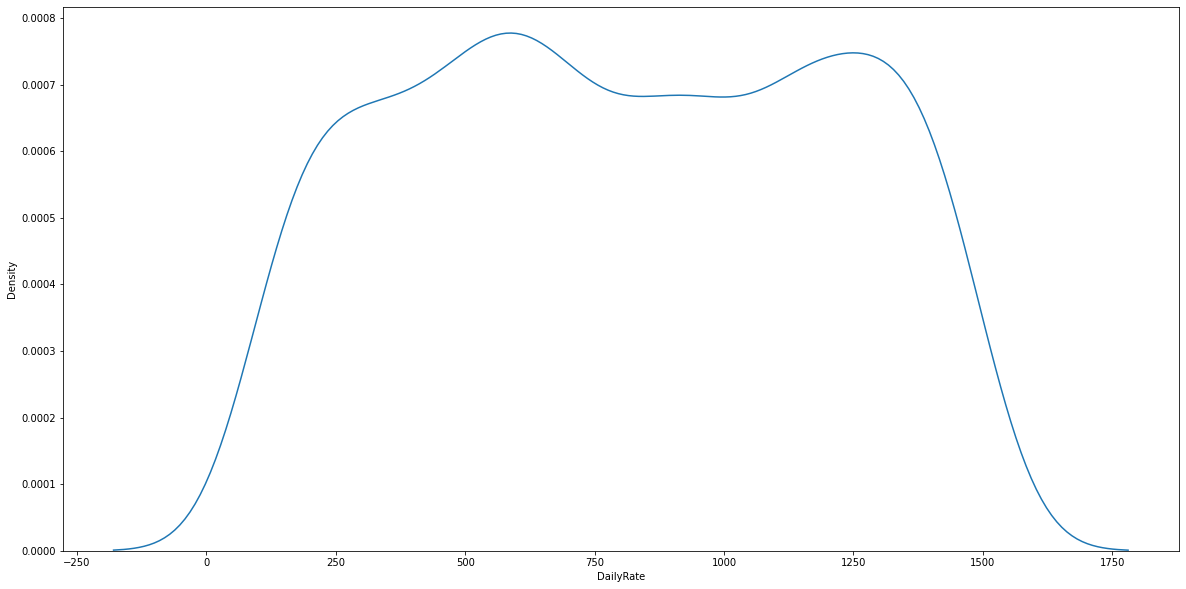

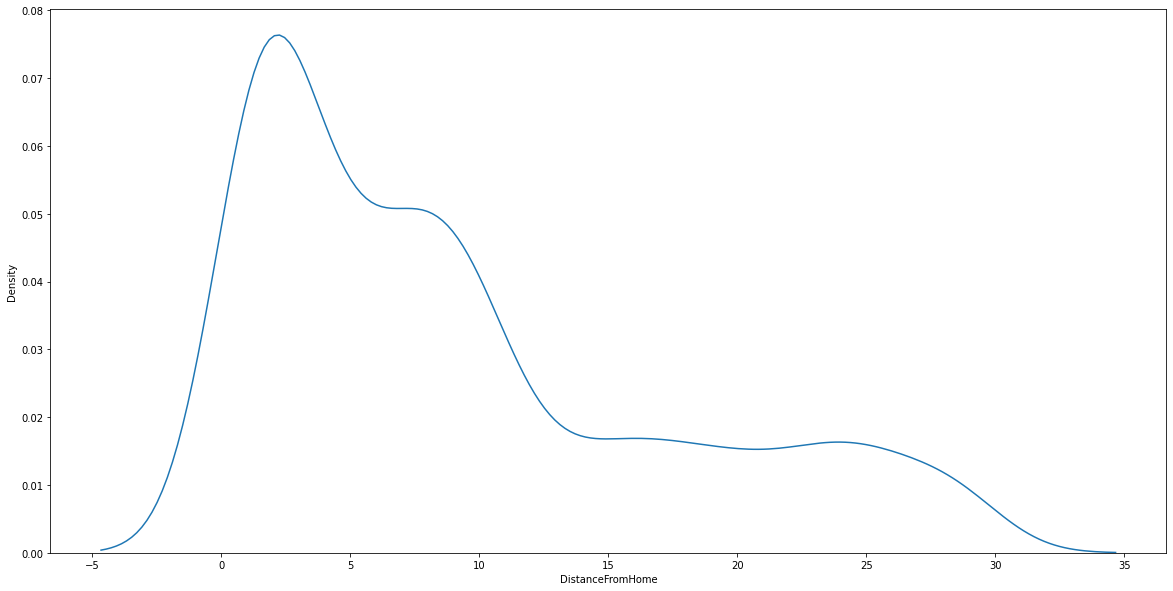

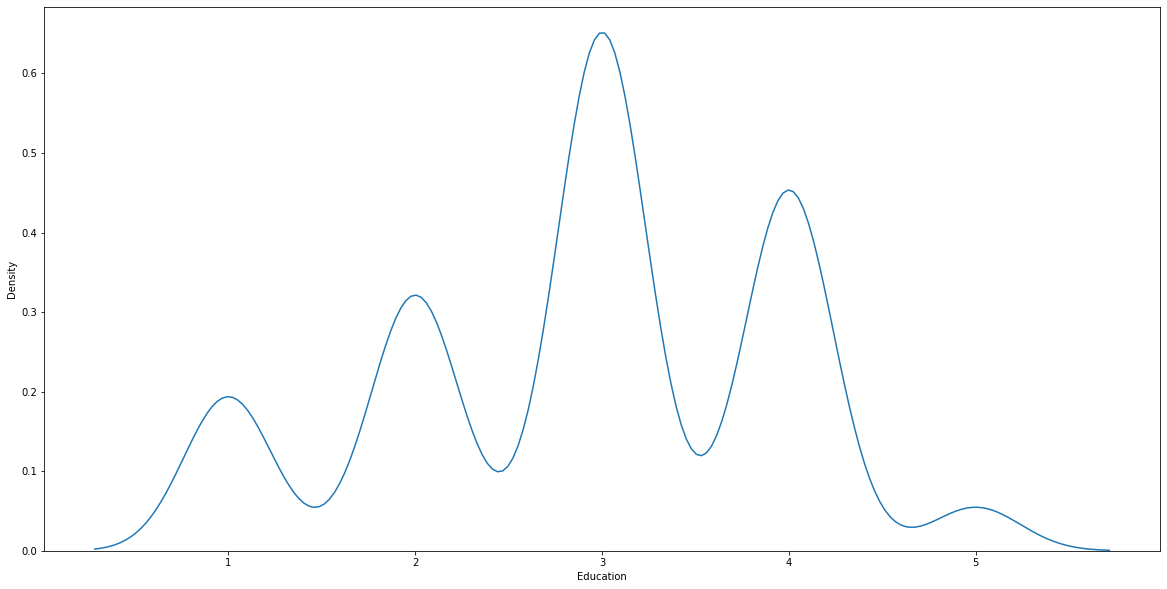

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


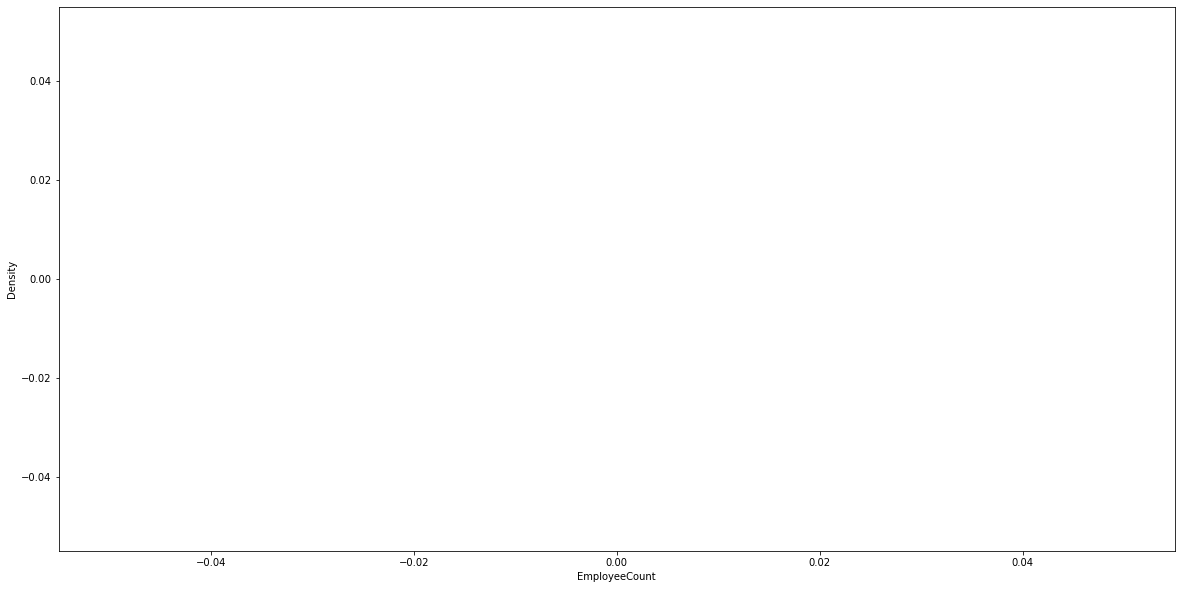

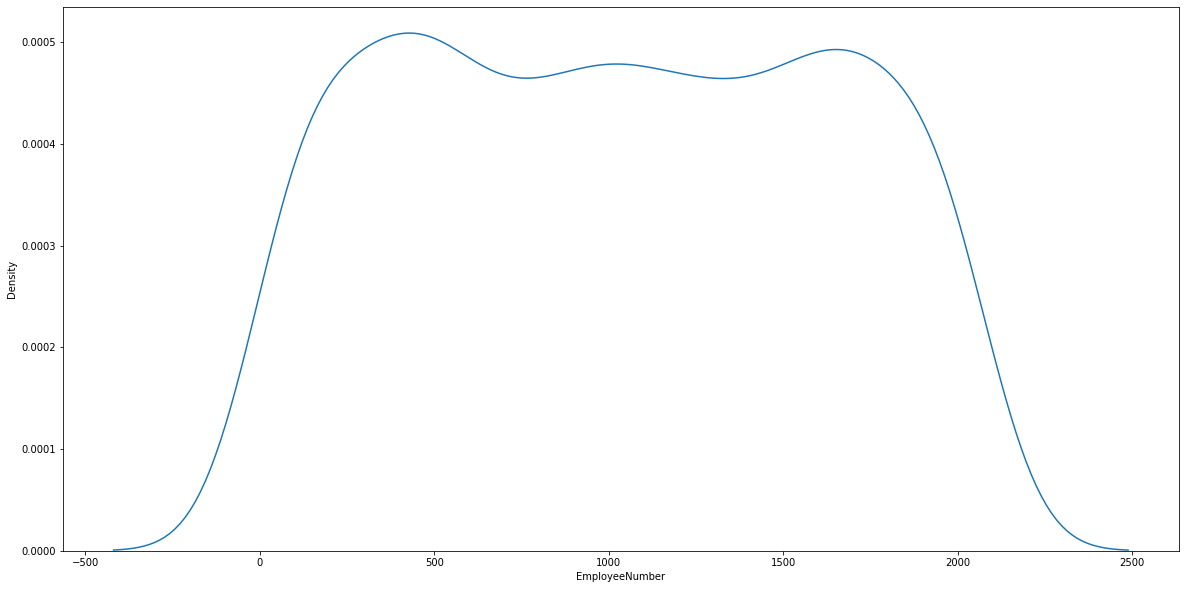

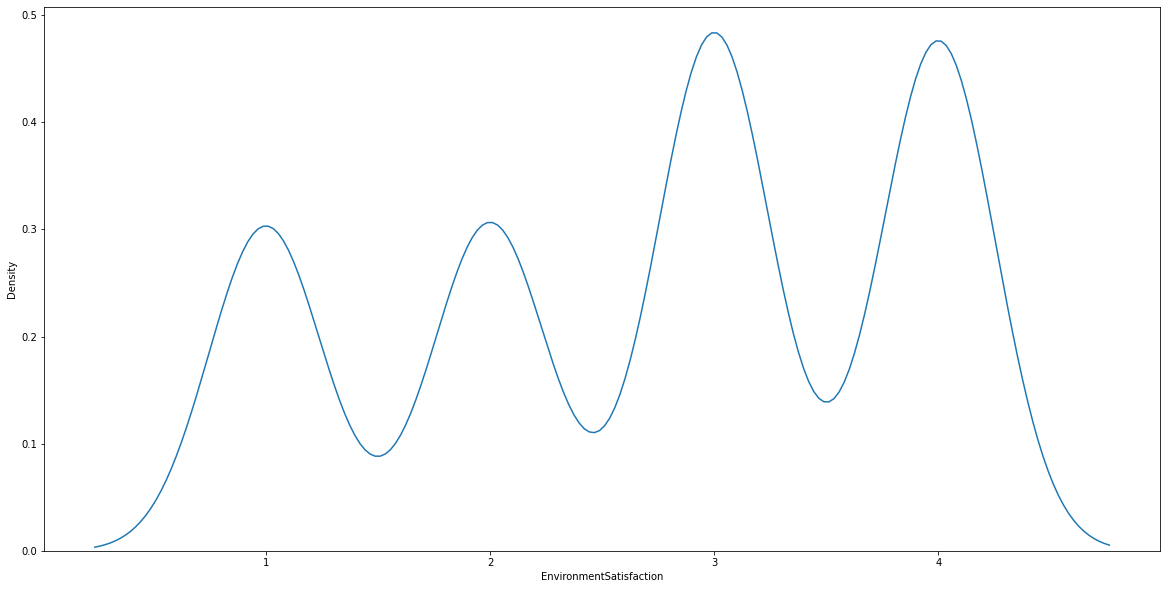

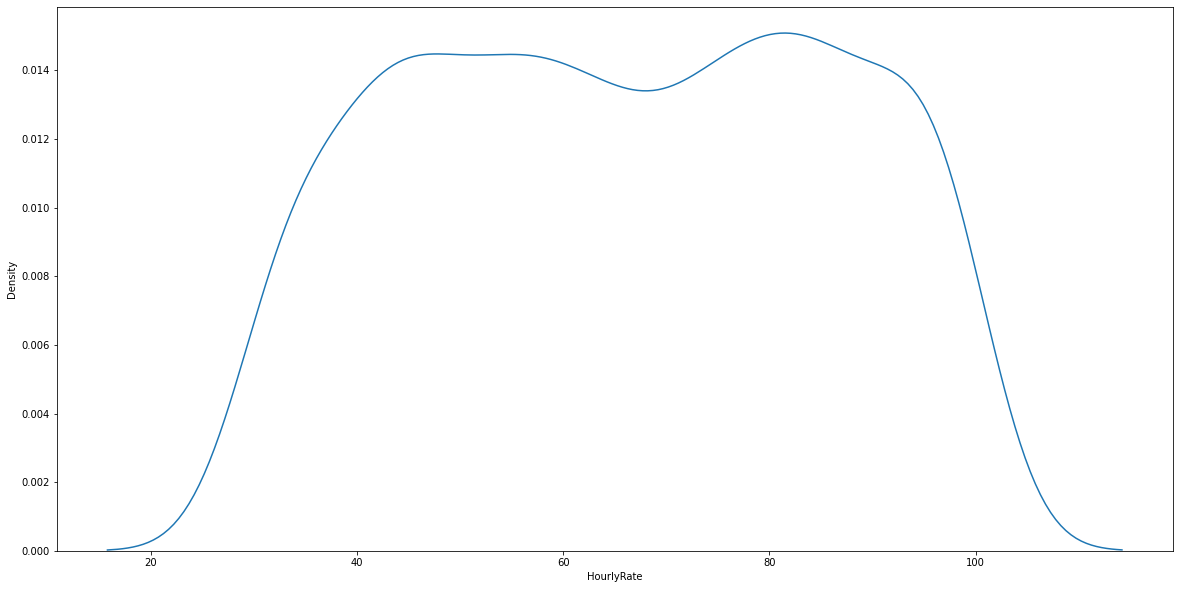

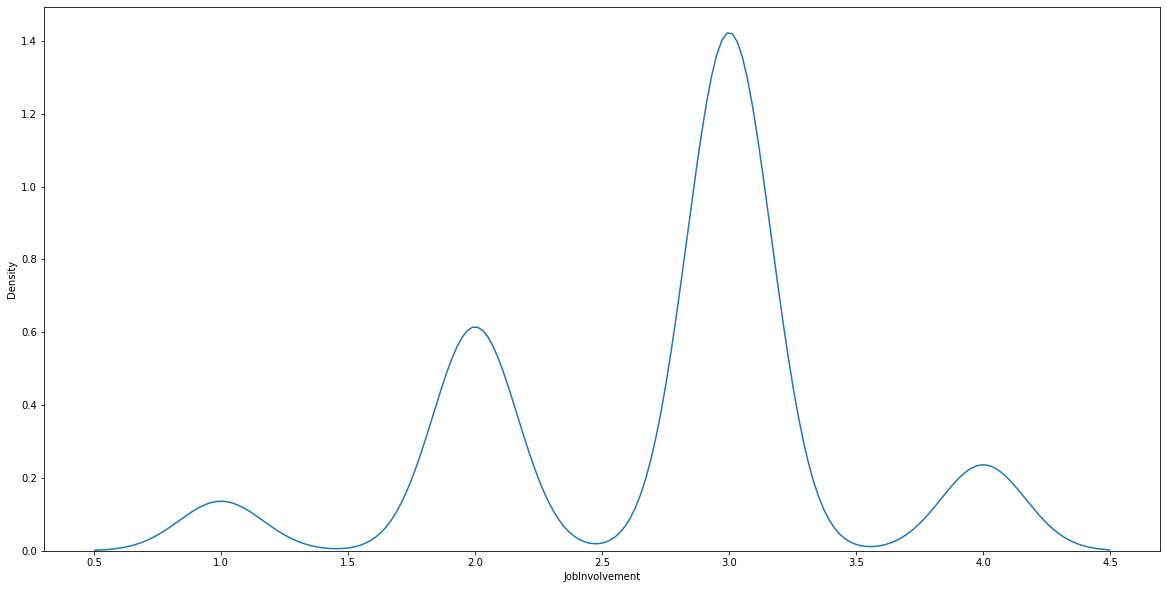

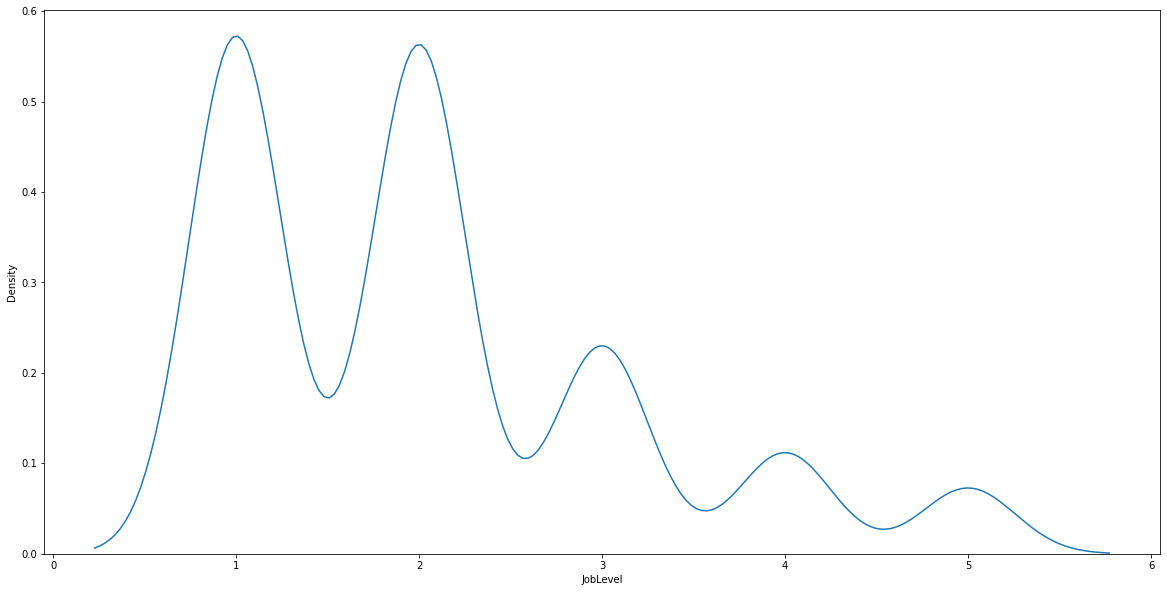

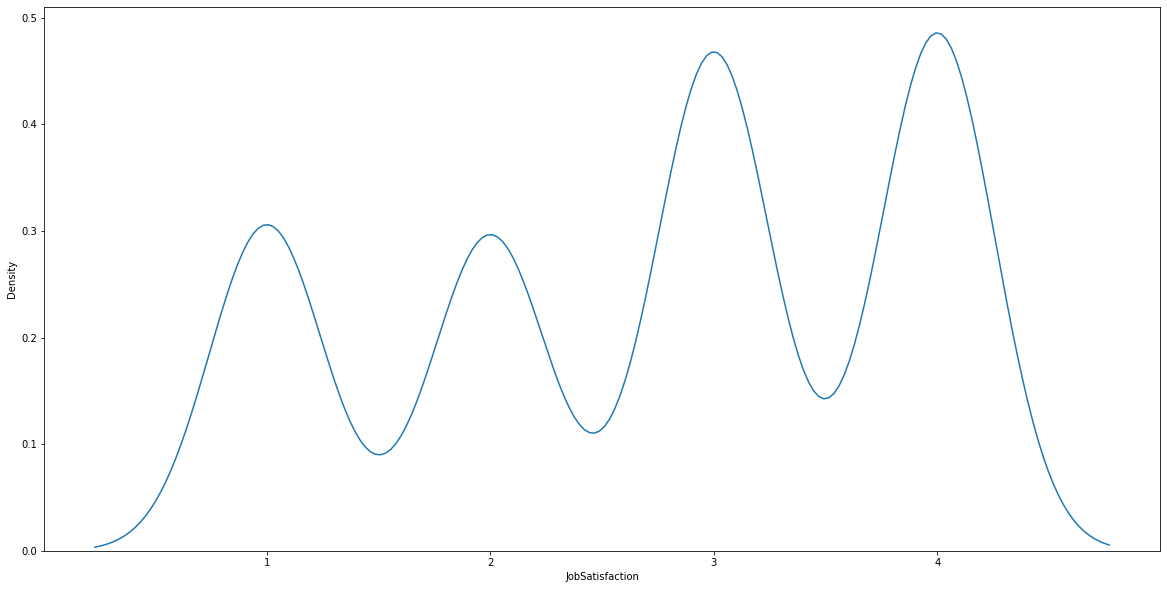

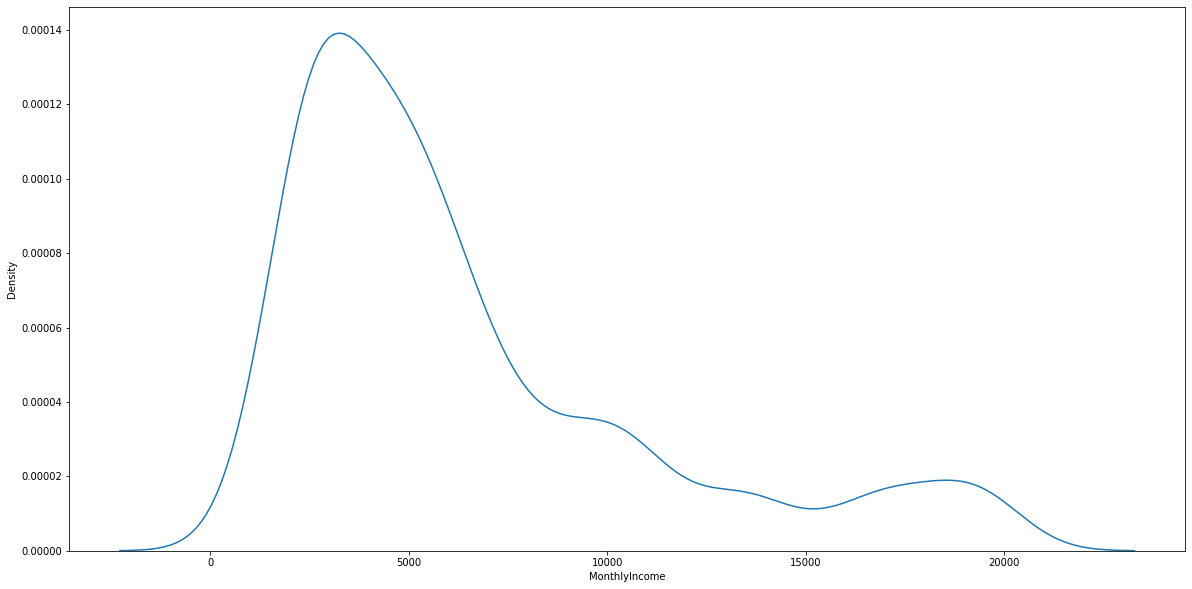

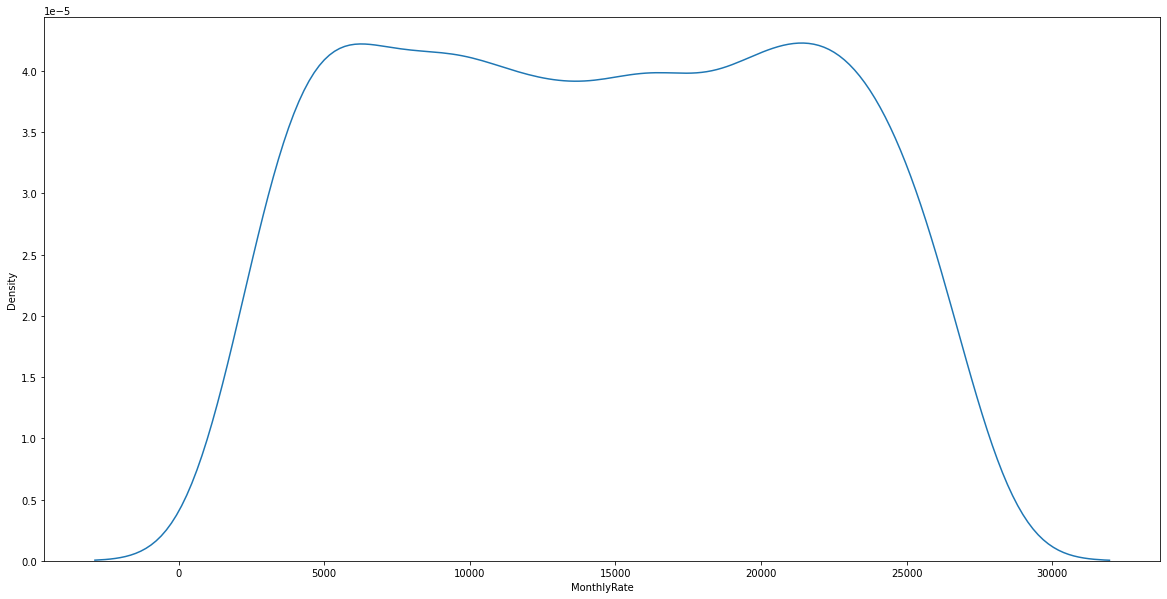

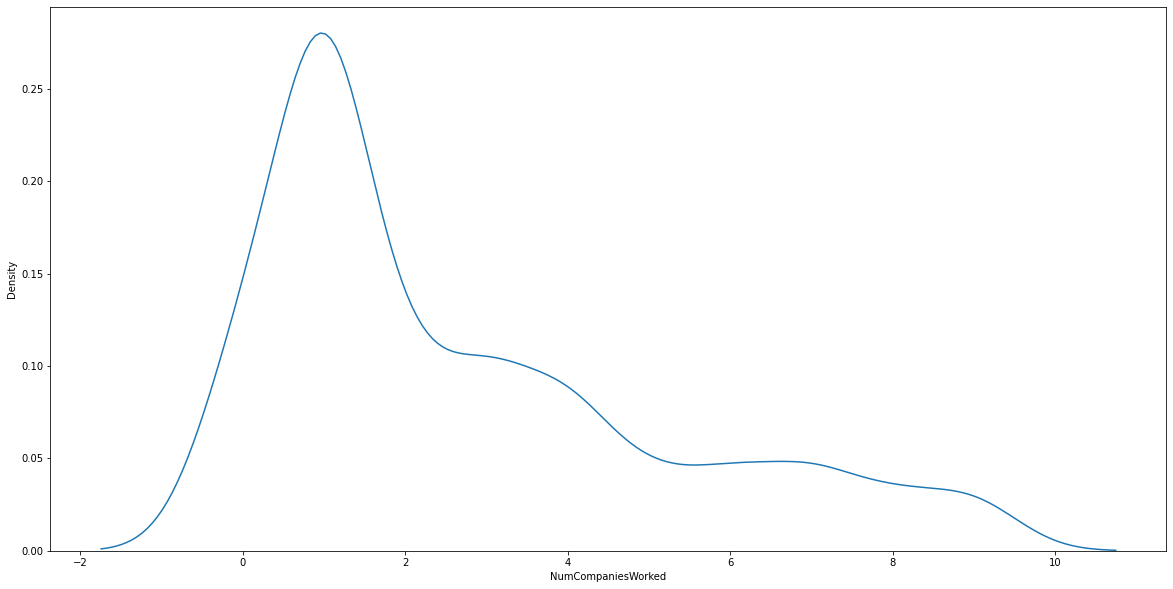

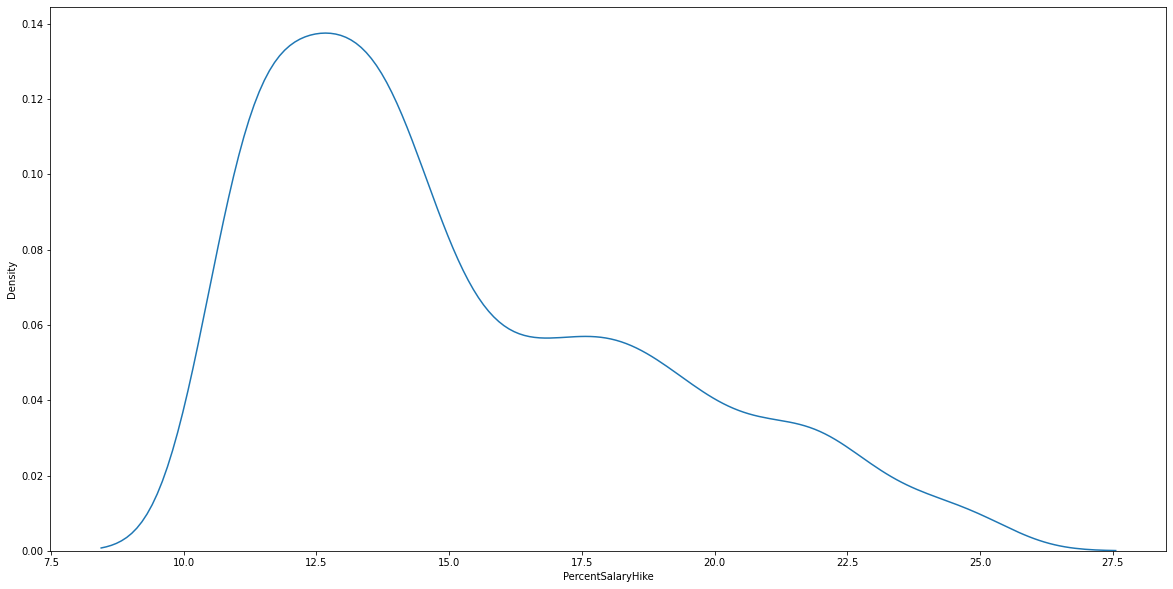

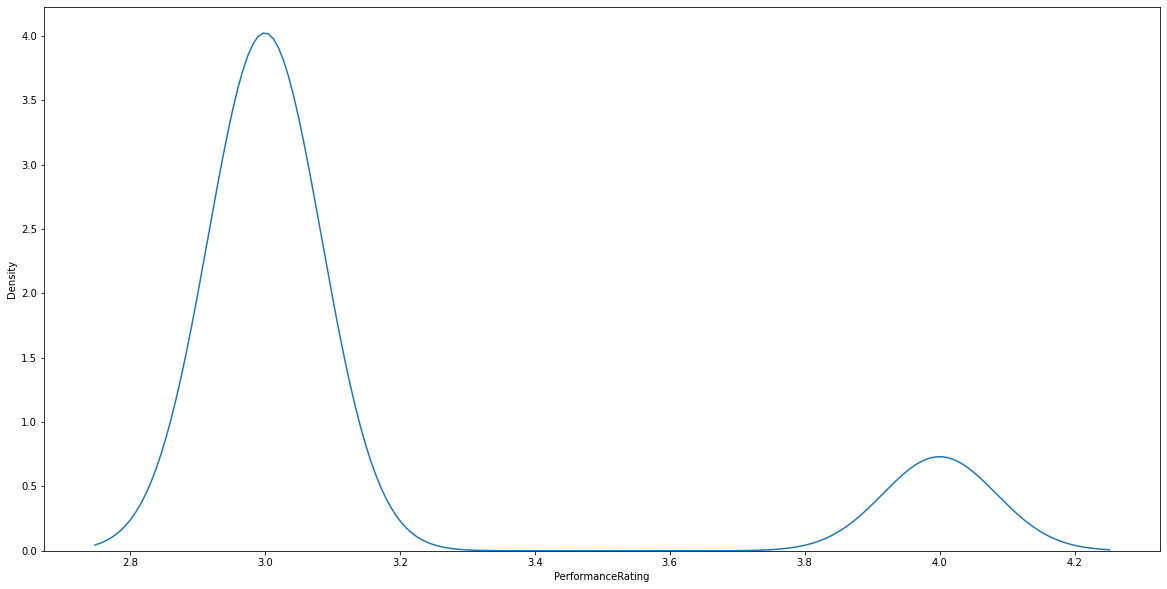

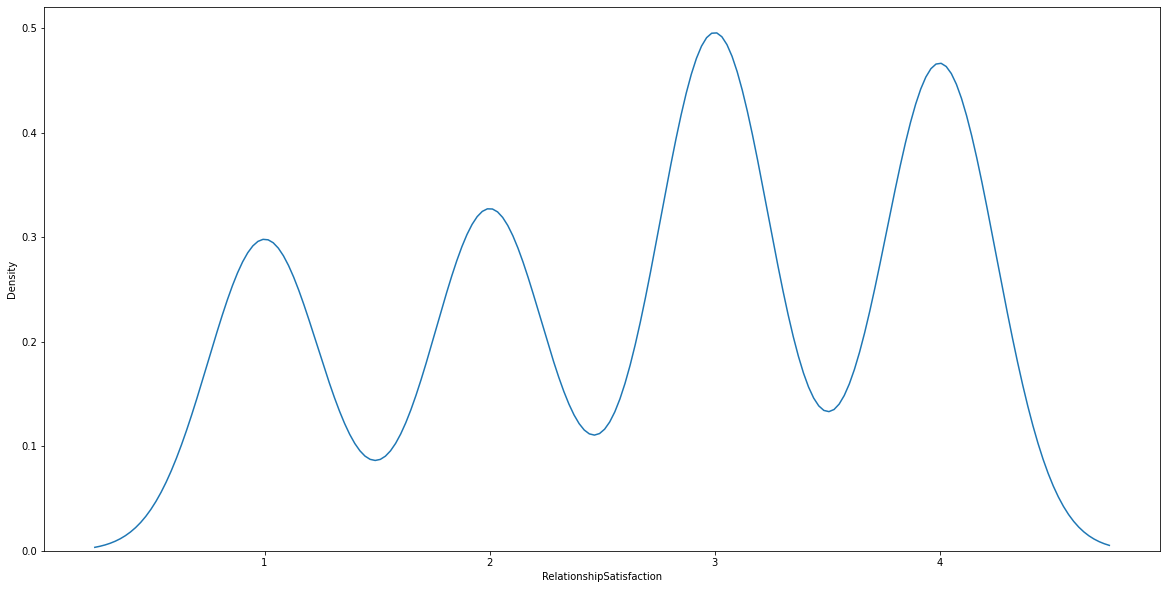

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


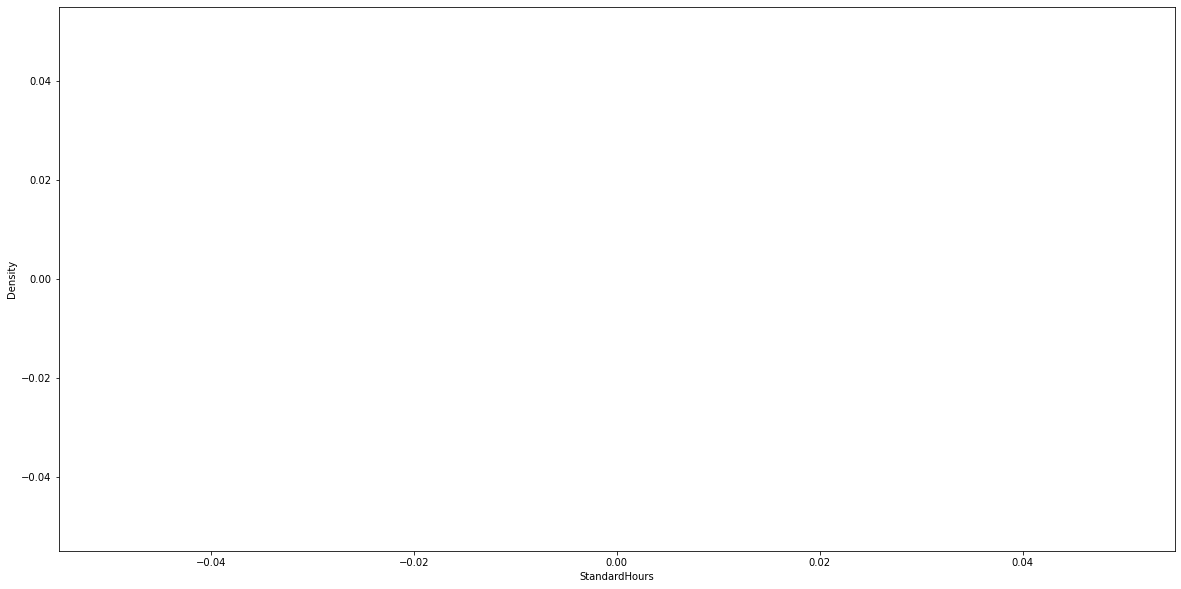

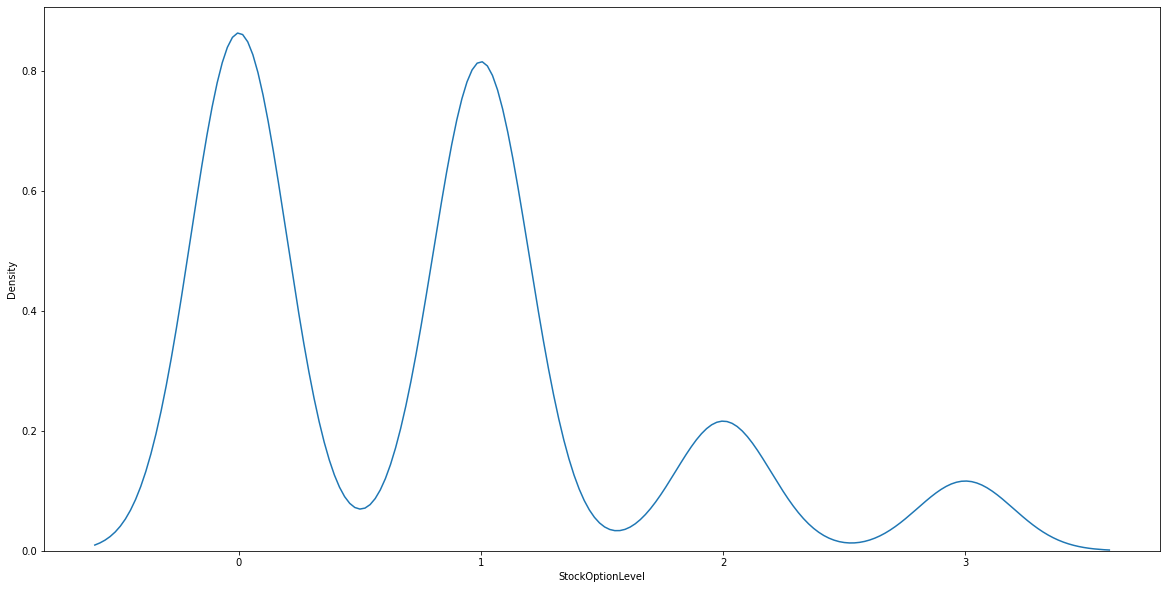

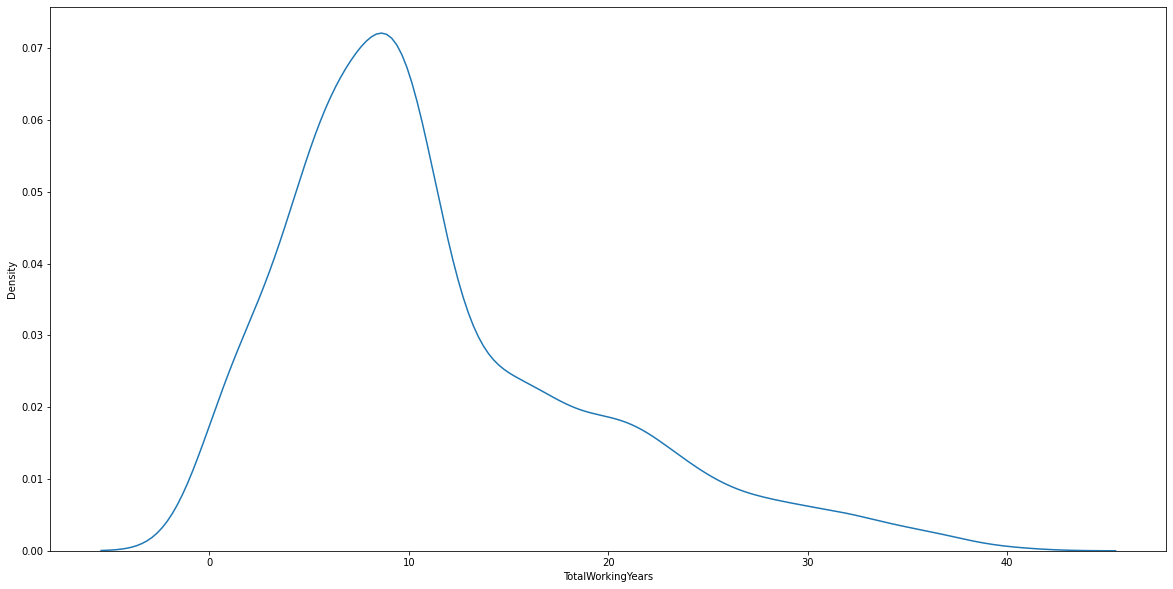

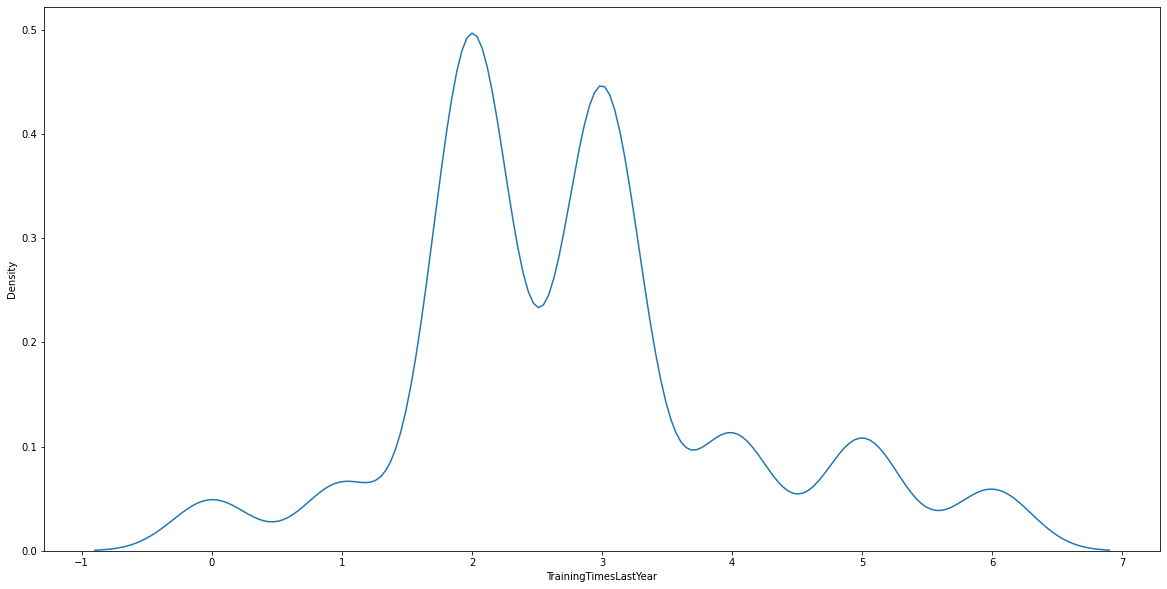

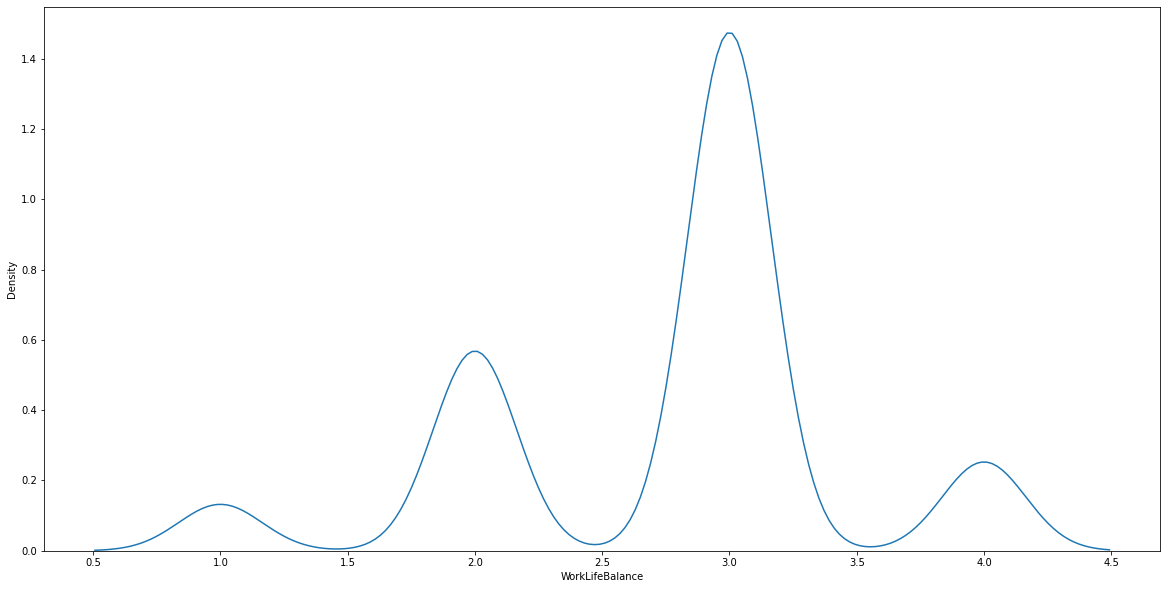

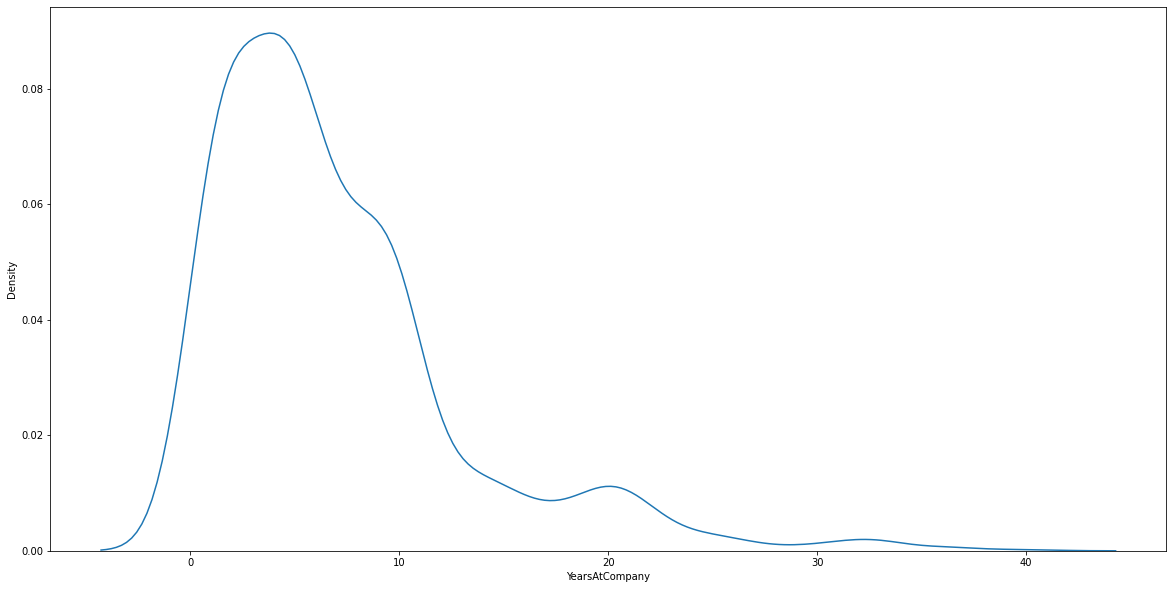

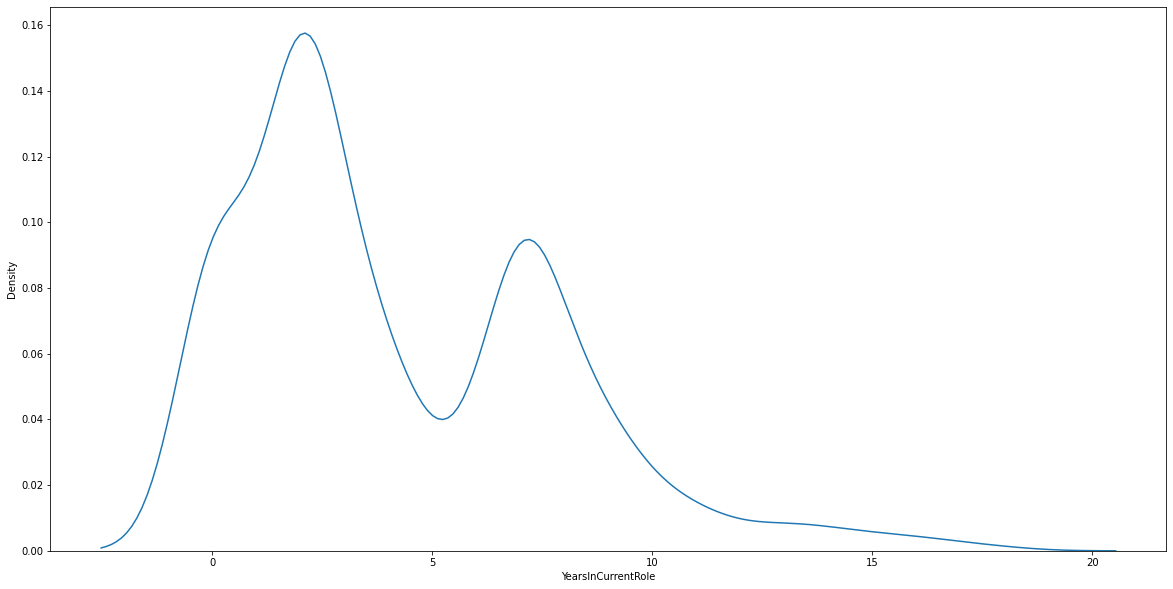

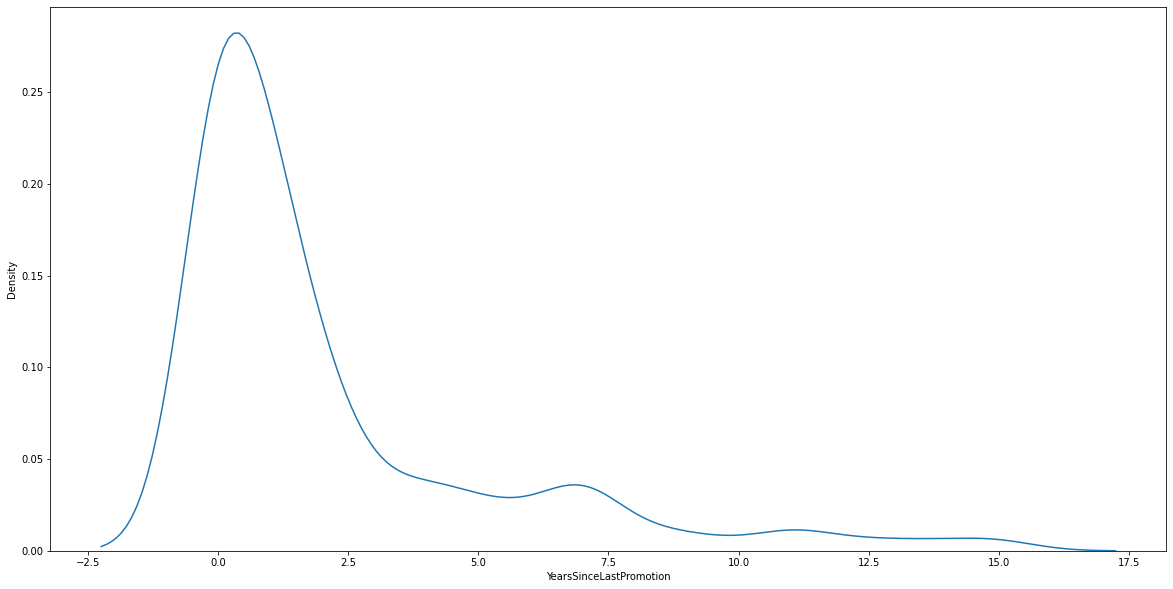

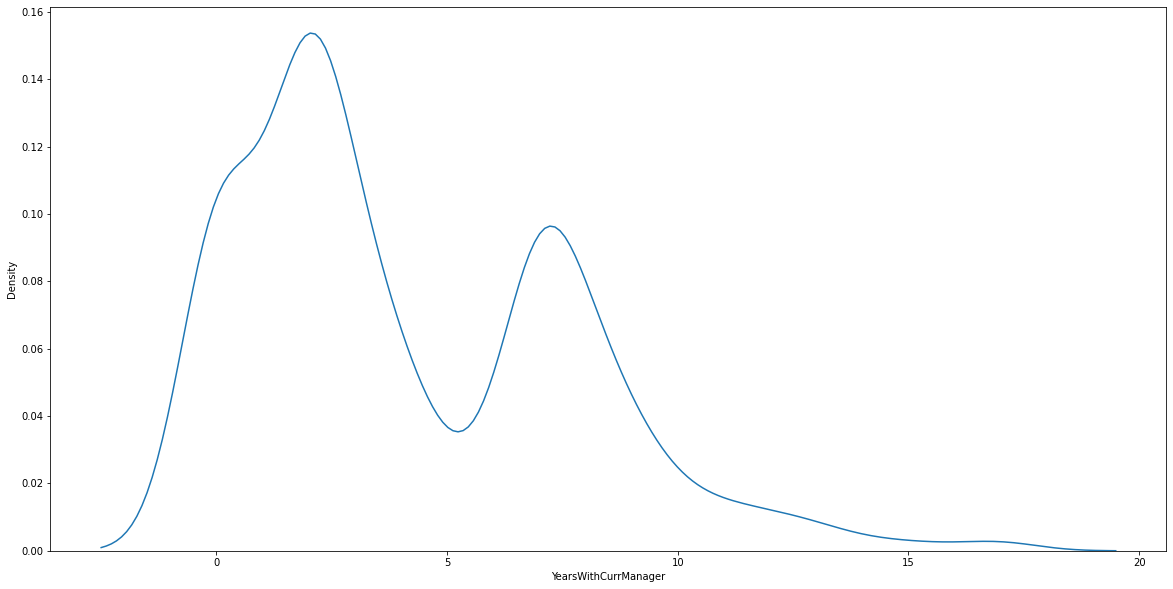

In [66]:
for column in numeric_columns:
    plt.figure(figsize=(20,10))
    sns.kdeplot(data=df, x=column, palette="hls")
    plt.show()

# EDA for categorical columns

In [67]:
categorical_columns = [column for column in df.columns if df[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


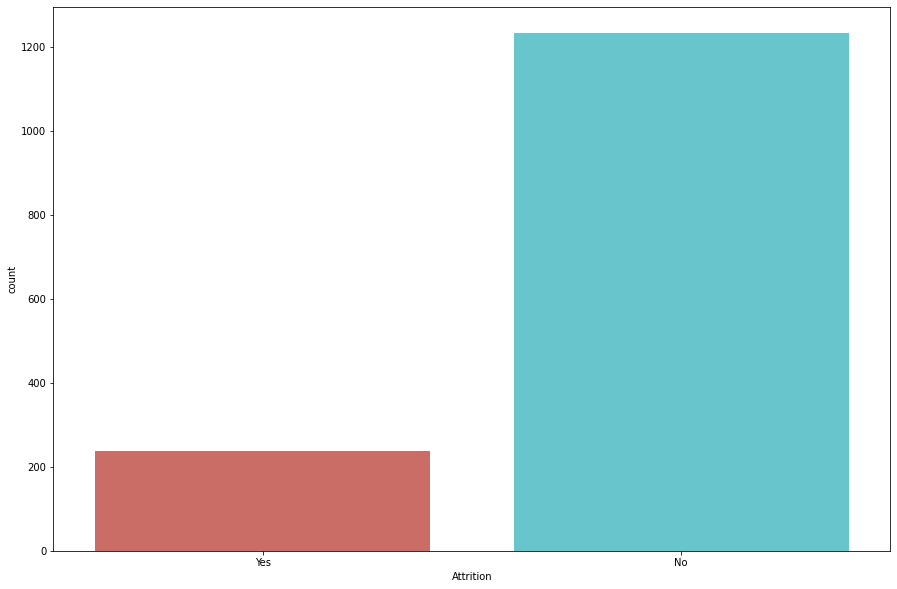

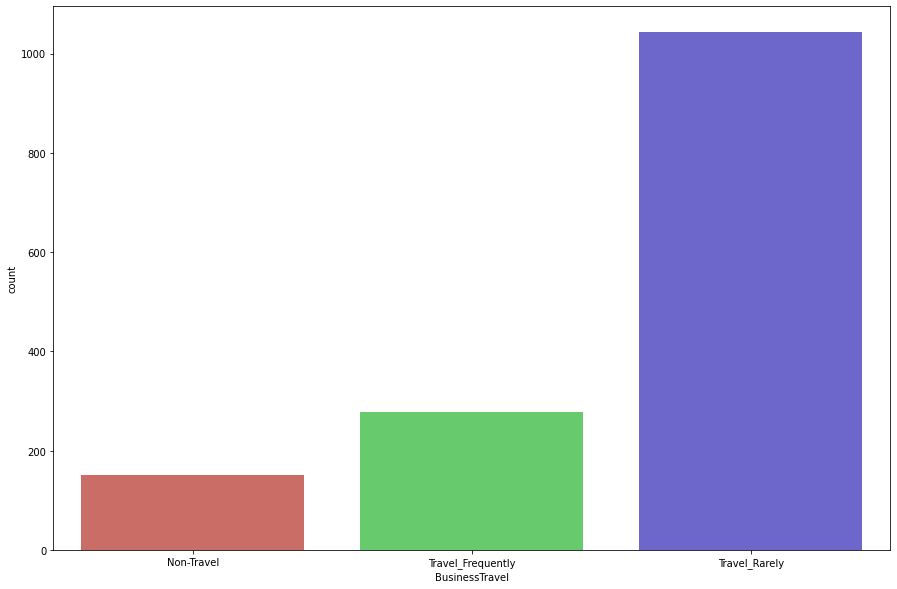

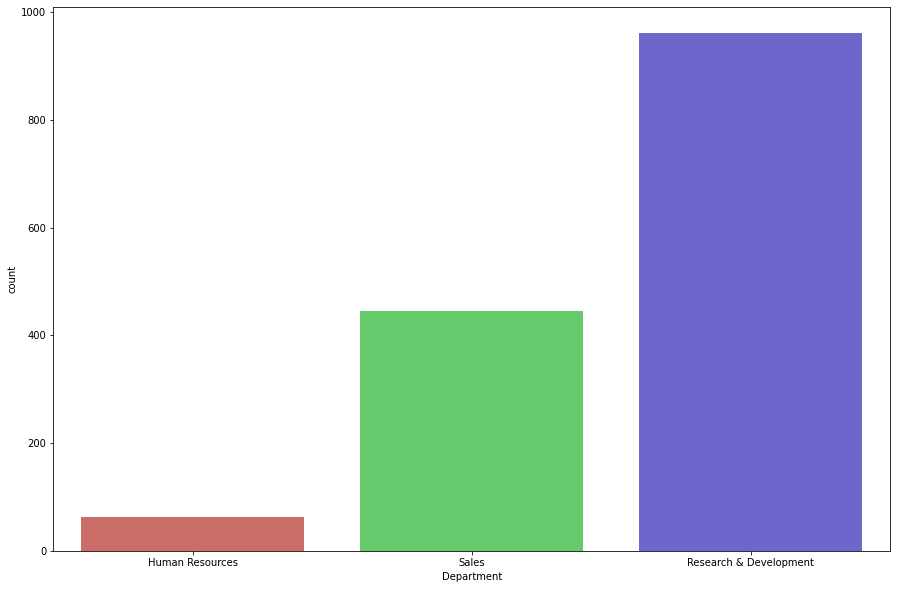

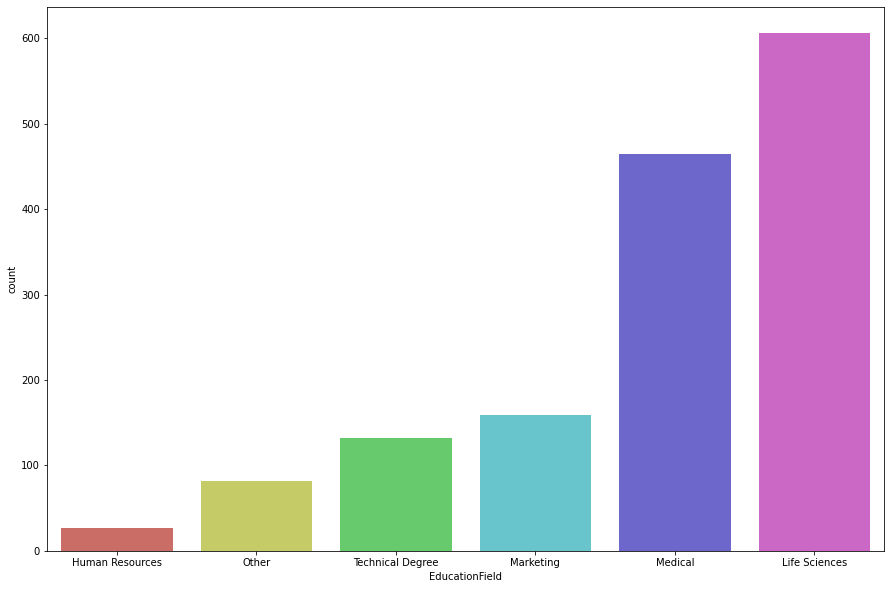

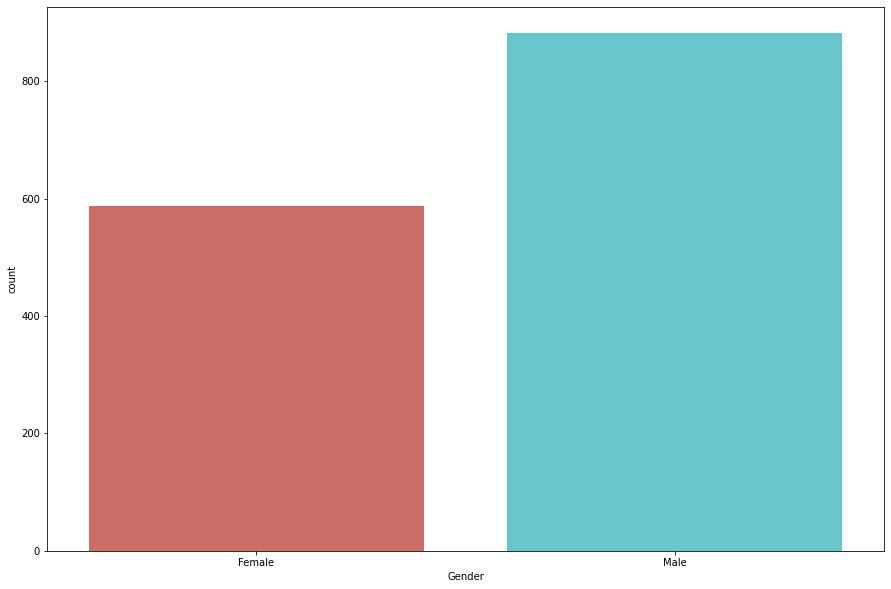

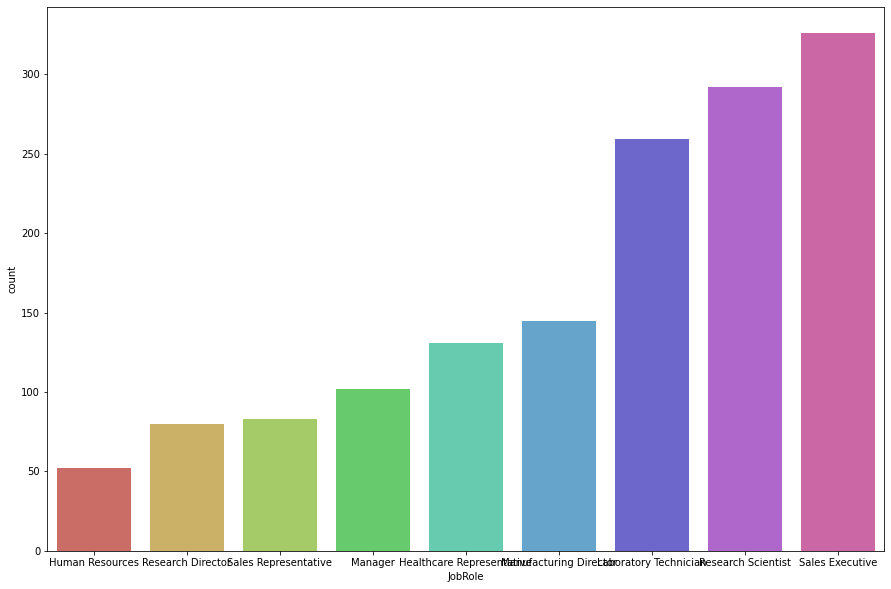

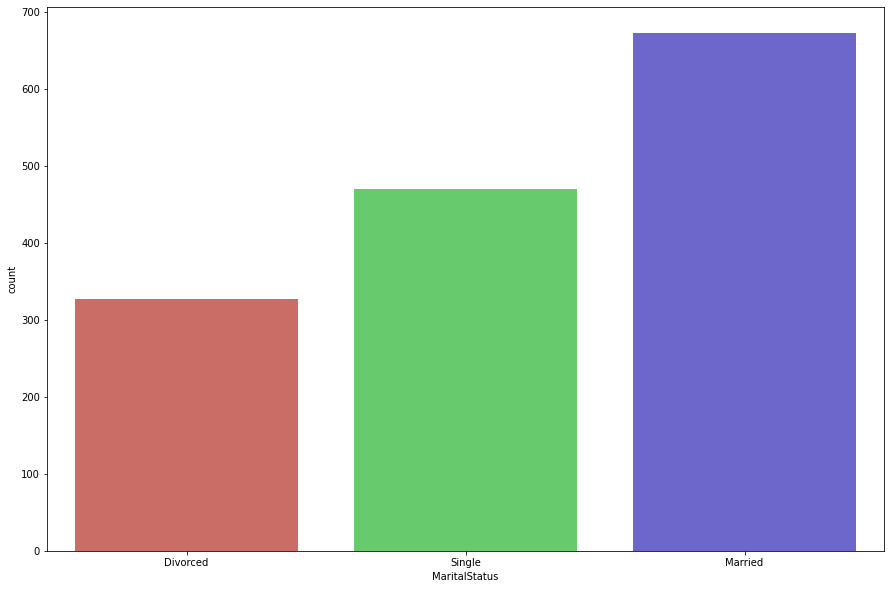

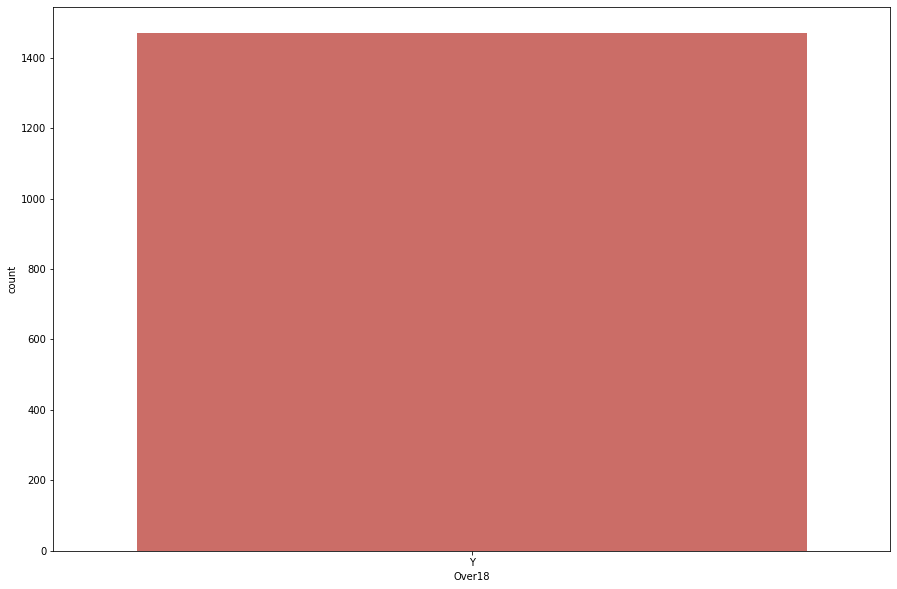

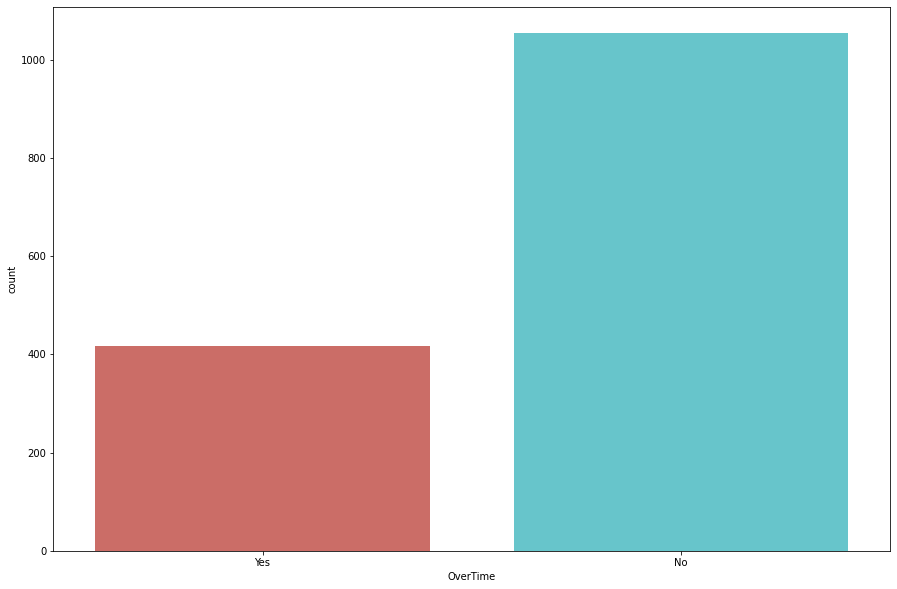

In [68]:
for column in categorical_columns:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df[column],order=df[column].value_counts().index[::-1],palette="hls")
    plt.show()

In [69]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Droping Unwanted columns**

# EmployeeCount,EmployeeNumber are unwanted columns because we cannot use unique value as feature and over18 beacuse only who complted 18 only have rights to work.

In [70]:
df = df.drop(['EmployeeNumber'],axis=1)

In [71]:
df = df.drop(['EmployeeCount'],axis=1)

In [72]:
df = df.drop(['Over18'],axis=1)

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Encoding**

# Going to do categorical encoding beacuse there is a order in the data.

In [74]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0})
df['Department'] = df['Department'].map({'Sales':1, 'Research & Development':2, 'Human Resources':0})
df['EducationField'] = df['EducationField'].map({'Life Sciences':5, 'Other':1, 'Medical':4, 'Marketing':3,'Technical Degree':2, 'Human Resources':0})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['JobRole'] = df['JobRole'].map({'Sales Executive':8, 'Research Scientist':7, 'Laboratory Technician':6,
       'Manufacturing Director':5, 'Healthcare Representative':4, 'Manager':3,
       'Sales Representative':2, 'Research Director':1, 'Human Resources':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':1, 'Married':2, 'Divorced':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [75]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

In [76]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Data preparation and splitting**

In [77]:
X = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].values
y = df['Attrition'].values

In [78]:
original_feature = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
# This is for Seeing Feature Importance Later.

In [79]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 1470 rows and 31 columns
Dependent features has 1470 rows and 1 column


# **Splitting Data**

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (1029, 31)
The shape of X test: (441, 31)
The shape of y train: (1029,)
The shape of y test: (441,)


# **Scaling the data**

In [82]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# **Balancing the data**

In [83]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Over-sampling followed by under-sampling**

Now, we will do a combination of over-sampling and under-sampling, using the
SMOTE and Tomek links techniques:

In [84]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

# **Implemeting Machine Learning Algorithm in the Balanced data**

# **Logistic regression**

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
y_pred=lr.predict(X_test_scaled)

In [86]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


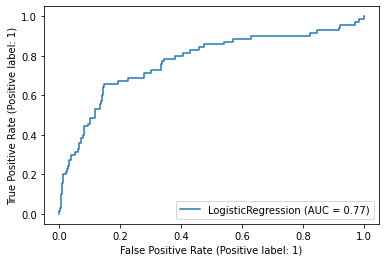

In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
plot_roc_curve(lr, X_test_scaled, y_test)

# **KNN Algoritm**

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled, y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))
  # Using cross validation finding the best k(hyper parameter) value

K value  :  1  train score :  0.6686103012633625  score :  0.7920616790405482
K value  :  2  train score :  0.7240038872691934  score :  0.8474205216067009
K value  :  3  train score :  0.5937803692905733  score :  0.8406244051018466
K value  :  4  train score :  0.6365403304178814  score :  0.8484104321340187
K value  :  5  train score :  0.5539358600583091  score :  0.8435560632019797
K value  :  6  train score :  0.5792031098153547  score :  0.8503616980772891
K value  :  7  train score :  0.5160349854227405  score :  0.8523129640205596
K value  :  8  train score :  0.5403304178814383  score :  0.8513230534932419
K value  :  9  train score :  0.4897959183673469  score :  0.8532743194365124
K value  :  10  train score :  0.511175898931001  score :  0.8493813059204264
K value  :  20  train score :  0.41496598639455784  score :  0.8454787740338853
K value  :  50  train score :  0.3226433430515063  score :  0.8377117837426231


In [89]:
knn = KNeighborsClassifier(9) 
knn.fit(X_smt,y_smt)
y_pred=knn.predict(X_test_scaled)

In [90]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


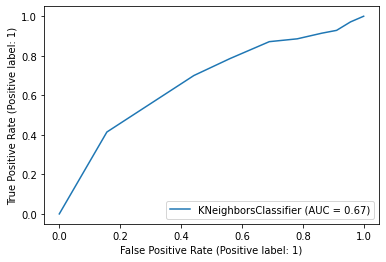

In [91]:
plot_roc_curve(knn, X_test_scaled, y_test)

# **Decission tree**

In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt, y_smt) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.6773566569484937  Cross val score :  0.8309156672377689
Depth  :  2  Training Accuracy :  0.5558794946550049  Cross val score :  0.8503616980772891
Depth  :  3  Training Accuracy :  0.7249757045675413  Cross val score :  0.8513325718636968
Depth  :  4  Training Accuracy :  0.7482993197278912  Cross val score :  0.8416143156291642
Depth  :  5  Training Accuracy :  0.7230320699708455  Cross val score :  0.8328574148105844
Depth  :  6  Training Accuracy :  0.7910592808551993  Cross val score :  0.8270131353512278
Depth  :  7  Training Accuracy :  0.7735665694849369  Cross val score :  0.814401294498382
Depth  :  8  Training Accuracy :  0.8085519922254616  Cross val score :  0.8046544831524842
Depth  :  9  Training Accuracy :  0.826044703595724  Cross val score :  0.8007709880068532
Depth  :  10  Training Accuracy :  0.8377065111758989  Cross val score :  0.7745573957738434
Depth  :  20  Training Accuracy :  0.8435374149659864  Cross val score :  0.77066

In [93]:
dt = DecisionTreeClassifier(max_depth=3) 
dt.fit(X_smt, y_smt)
y_pred = dt.predict(X_test_scaled)

In [94]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


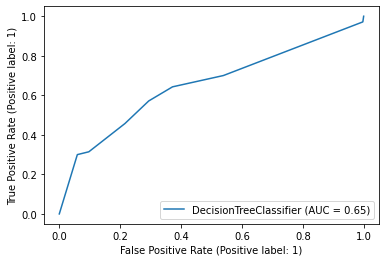

In [95]:
plot_roc_curve(dt, X_test_scaled, y_test)

# **Random forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
rf.fit(X_smt,y_smt)
y_pred = rf.predict(X_test_scaled)

In [97]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4.head()

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


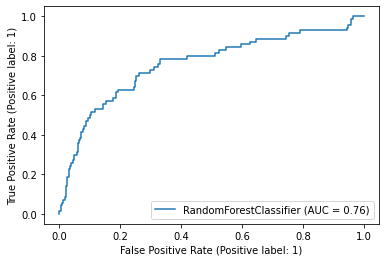

In [98]:
plot_roc_curve(rf, X_test_scaled, y_test)

# **XG boost**

In [99]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.717201166180758  Cross-Val score :  0.8610317913573196
Learning rate :  0.02  Train score :  0.7463556851311953  Cross-Val score :  0.8590900437845039
Learning rate :  0.03  Train score :  0.7667638483965015  Cross-Val score :  0.8629830573005901
Learning rate :  0.04  Train score :  0.7842565597667639  Cross-Val score :  0.8620121835141823
Learning rate :  0.05  Train score :  0.8075801749271136  Cross-Val score :  0.8629735389301351
Learning rate :  0.06  Train score :  0.8172983479105929  Cross-Val score :  0.867827907862174
Learning rate :  0.07  Train score :  0.8231292517006803  Cross-Val score :  0.867837426232629
Learning rate :  0.08  Train score :  0.8279883381924198  Cross-Val score :  0.8688083000190367
Learning rate :  0.09  Train score :  0.8396501457725948  Cross-Val score :  0.8629830573005901
Learning rate :  0.1  Train score :  0.8425655976676385  Cross-Val score :  0.8610413097277746
Learning rate :  0.11  Train score :  0.8386

In [100]:
model = xgb.XGBClassifier(learning_rate = 0.12, n_estimators=100)
model.fit(X_smt,y_smt) 
y_pred = model.predict(X_test_scaled)

In [101]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


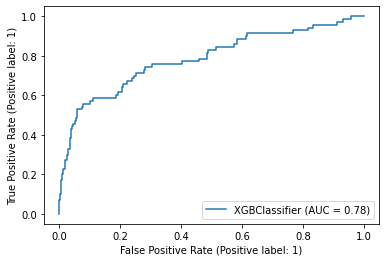

In [102]:
plot_roc_curve(model, X_test_scaled, y_test)

# **We are going to Use XG Booster because that gives us a good AUROC Score.**

# **Feature Importance**

In [103]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverTime             Importance: 0.14
Variable: JobLevel             Importance: 0.1
Variable: StockOptionLevel     Importance: 0.1
Variable: MonthlyIncome        Importance: 0.06
Variable: YearsAtCompany       Importance: 0.06
Variable: JobInvolvement       Importance: 0.05
Variable: MaritalStatus        Importance: 0.04
Variable: TotalWorkingYears    Importance: 0.04
Variable: YearsInCurrentRole   Importance: 0.04
Variable: YearsWithCurrManager Importance: 0.04
Variable: Age                  Importance: 0.03
Variable: JobRole              Importance: 0.03
Variable: JobSatisfaction      Importance: 0.03
Variable: Department           Importance: 0.02
Variable: DistanceFromHome     Importance: 0.02
Variable: EnvironmentSatisfaction Importance: 0.02
Variable: Gender               Importance: 0.02
Variable: MonthlyRate          Importance: 0.02
Variable: RelationshipSatisfaction Importance: 0.02
Variable: TrainingTimesLastYear Importance: 0.02
Variable: BusinessTravel       Imp

# **Importing the Best model using pickle package**

In [104]:
import pickle
filename = "Employee_model"
pickle.dump(model,open(filename,'wb'))

In [105]:
loaded_model = pickle.load(open(filename,'rb'))
pred = loaded_model.predict(X_test)